## Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (12,7)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
df = pd.read_csv("hearing_test.csv")
df.head()

,age,physical_score,test_result
0,33.000,40.700,1
1,50.000,37.200,1
2,52.000,24.700,0
3,56.000,31.000,0
4,35.000,42.900,1


## EDA

Lojistik regresyon gibi klassifikasyon modellerde target daki hedef değişken her zaman 1 olacak örneğin 

kanser + olanlar = 1

Spam var yok algoritmasında spamlar = 1

Dersi geçmeyenlere yönelik alkgoritmada geçemeyneler = 1 olacak

Kısaca olumlu olumsuz olanra göre dewğil hedef değişkene göre sınıflandırma yapacağız. ilk başta

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5000.000,51.609,11.287,18.000,43.000,51.000,60.000,90.000
physical_score,5000.000,32.760,8.170,-0.000,26.700,35.300,38.900,50.000
test_result,5000.000,0.600,0.490,0.000,0.000,1.000,1.000,1.000


In [6]:
df["test_result"].value_counts() ## Data Balance mı Unbalance mı?

1    3000
0    2000
Name: test_result, dtype: int64

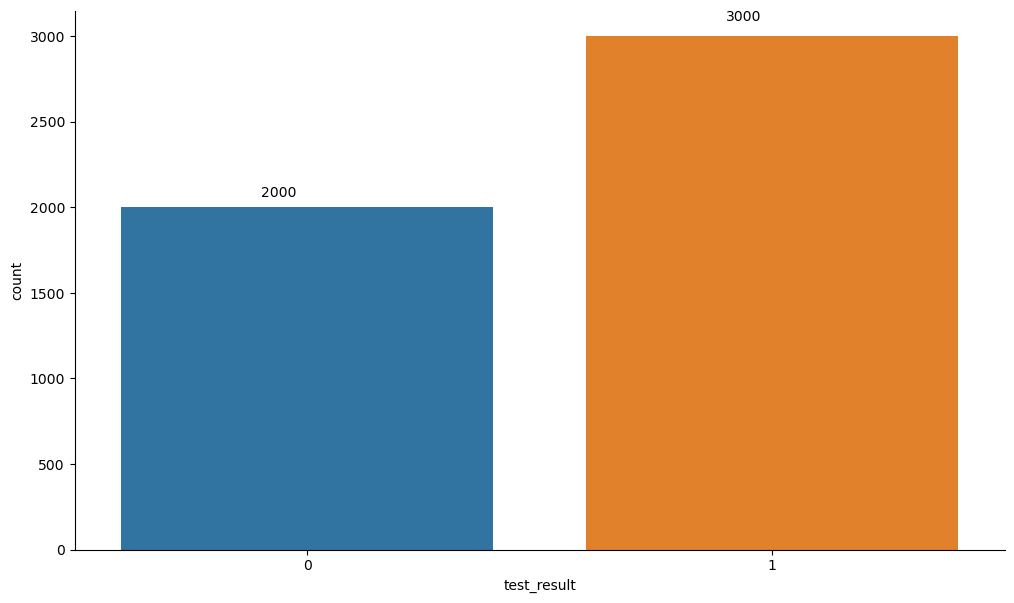

In [7]:
ax = sns.countplot(df['test_result'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

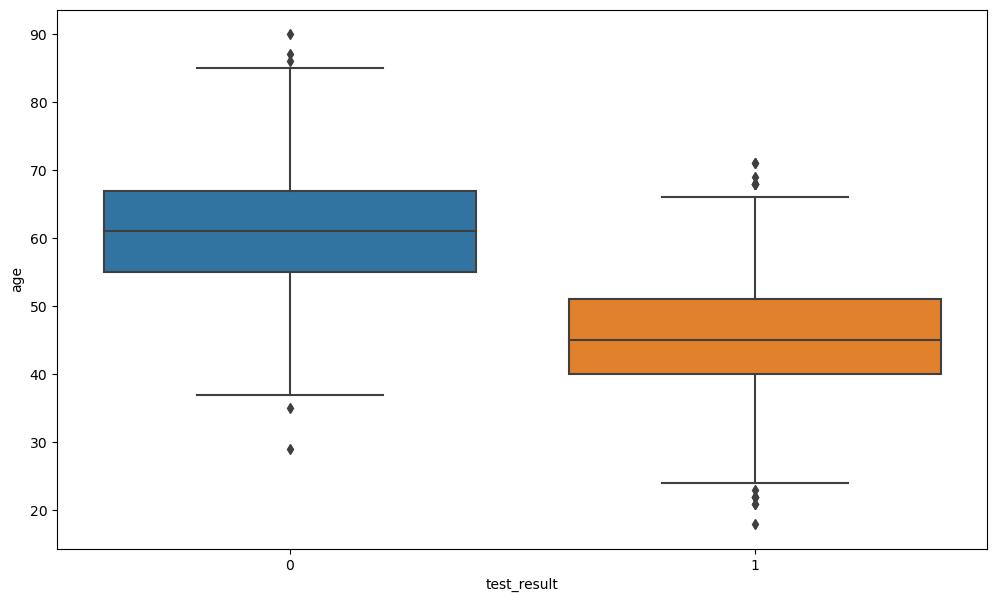

In [8]:
sns.boxplot(x='test_result',y='age',data=df);

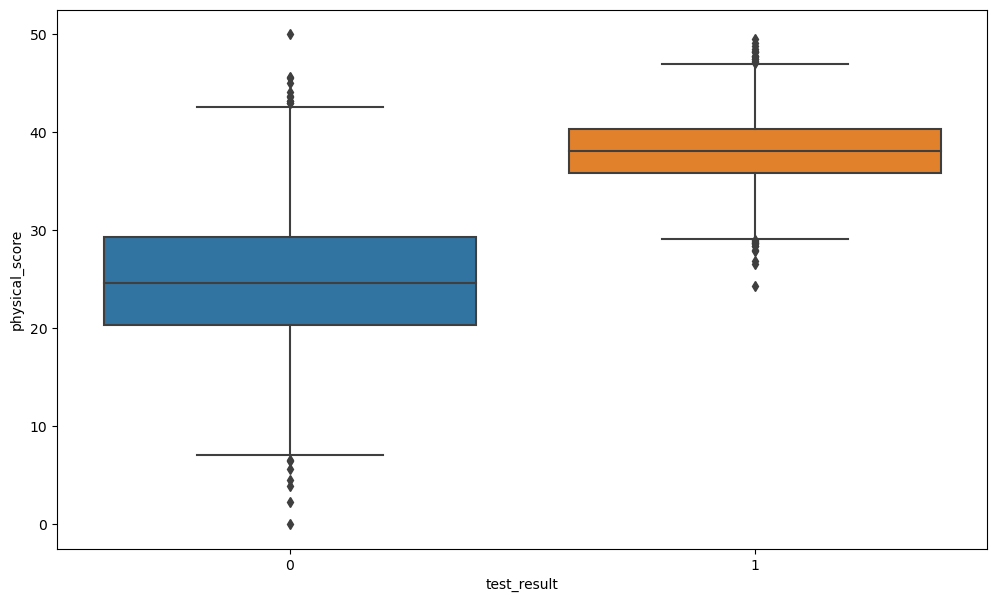

In [9]:
sns.boxplot(x='test_result',y='physical_score',data=df);

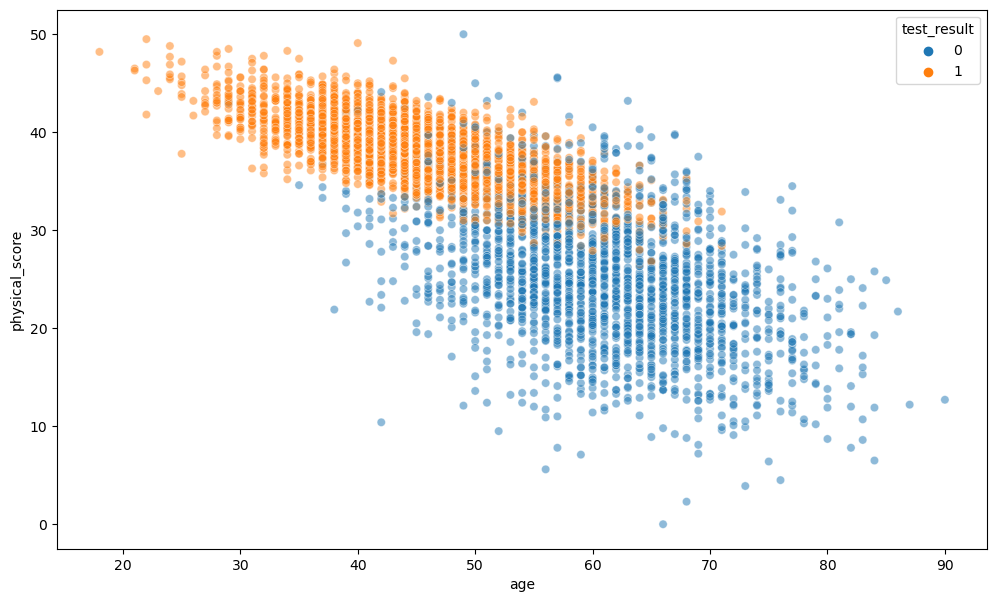

In [10]:
sns.scatterplot(x="age", y="physical_score", data = df, hue = "test_result", alpha = 0.5); ## hue paramtresine her zaman taget ver

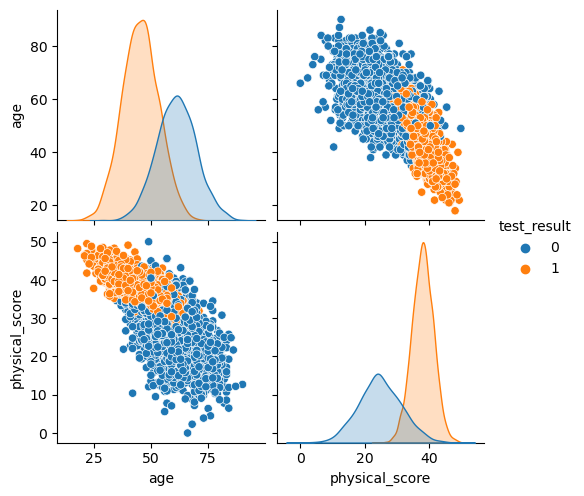

In [11]:
sns.pairplot(df, hue = "test_result");

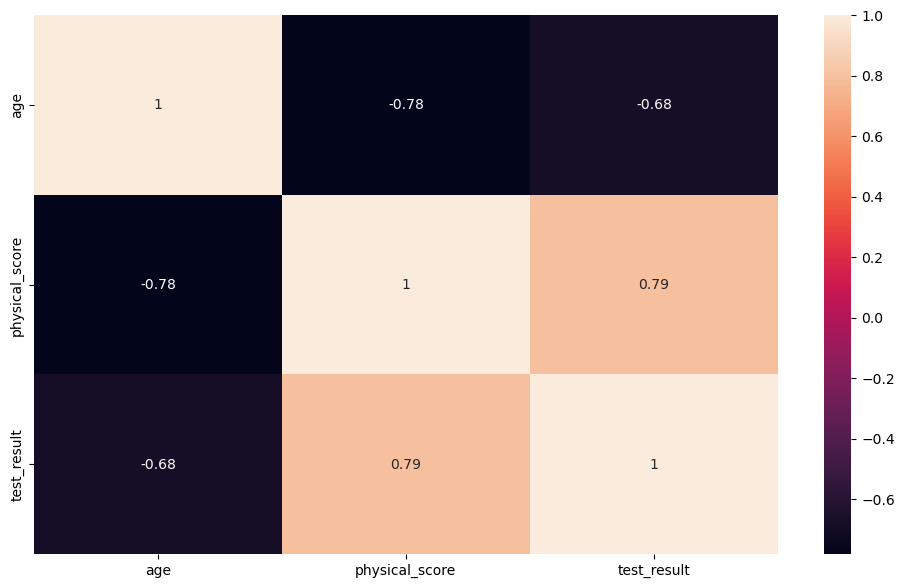

In [12]:
sns.heatmap(df.corr(), annot = True);

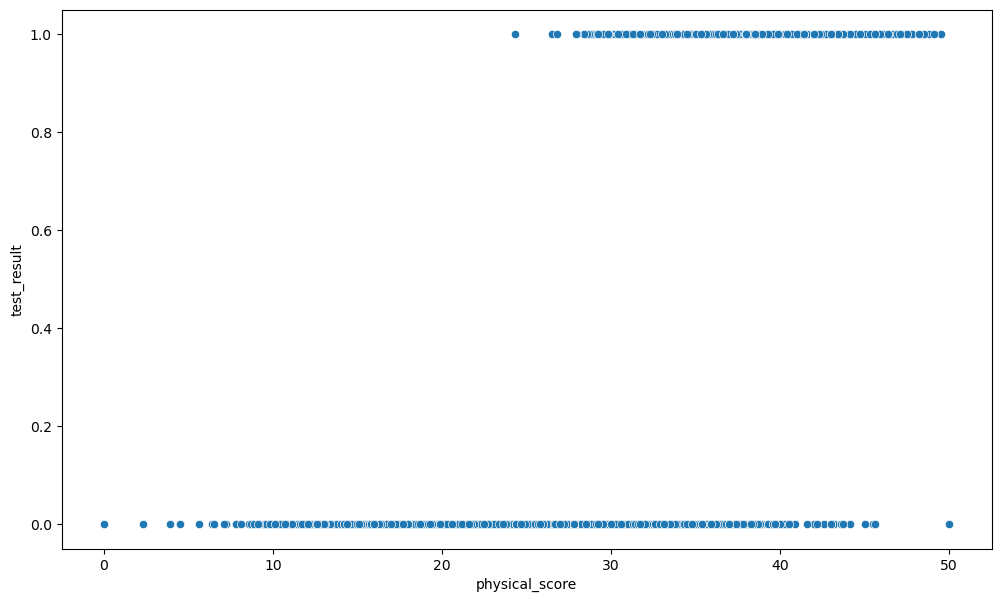

In [13]:
sns.scatterplot(x='physical_score',y='test_result',data=df);

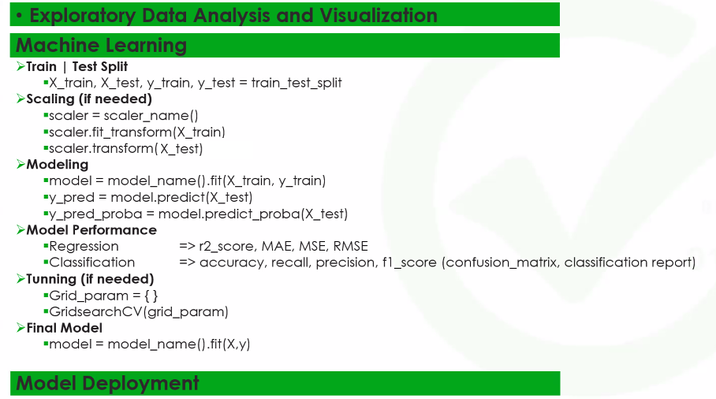

## Train | Test Split

In [14]:
X = df.drop("test_result", axis = 1)
y = df["test_result"]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #test size == > amacımız train setine eğitim için maximum veri sağlamak olmalı.

## Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling datayi ayni dilden kosuyor hale getirmek.

In [18]:
X_train_scaled = scaler.fit_transform(X_train) #scale fit işlemini sadece X_train uygulanır
X_test_scaled = scaler.transform(X_test)

## Modeling

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
log_model.coef_ ## Normalde bakmayacağız sadece ilk defa olduğundan bakıyoruz, yas ve fiziksel score

array([[-0.94953524,  3.45991194]])

In [23]:
log_model.intercept_ ## Normalde bakmayacağız sadece ilk defa olduğundan bakıyoruz, x 0 iken dogrunun y'yi kestigi nokta.

array([0.48867341])

In [24]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [25]:
y_pred_proba = log_model.predict_proba(X_test_scaled) ## olasılık hesaplarını görmek için kullanılan kod
y_pred_proba ## ilk derse özel sonradan buna bakmayacağız
# Sol taraf 0, sag taraf 1 hangisi büyükse onu tahmin etmis model.

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

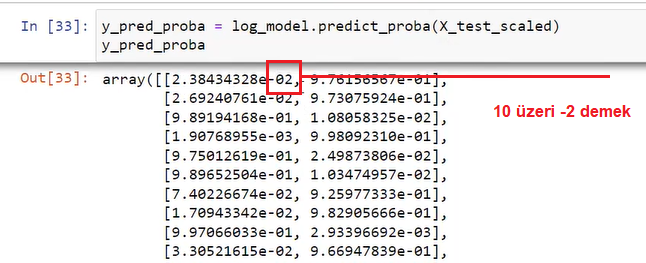

In [26]:
    test_data = pd.concat([X_test, y_test], axis = 1) ## ilk derse özel
    test_data

,age,physical_score,test_result
1718,39.000,37.800,1
2511,45.000,38.700,1
345,56.000,21.800,0
2521,40.000,44.000,1
54,64.000,25.400,0
...,...,...,...
4770,46.000,37.700,1
188,59.000,36.500,1
3335,54.000,22.800,0
4583,58.000,20.500,0


In [27]:
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data

,age,physical_score,test_result,pred_proba
1718,39.000,37.800,1,0.976
2511,45.000,38.700,1,0.973
345,56.000,21.800,0,0.011
2521,40.000,44.000,1,0.998
54,64.000,25.400,0,0.025
...,...,...,...,...
4770,46.000,37.700,1,0.956
188,59.000,36.500,1,0.813
3335,54.000,22.800,0,0.019
4583,58.000,20.500,0,0.005


In [28]:
test_data["pred"] = y_pred
test_data

,age,physical_score,test_result,pred_proba,pred
1718,39.000,37.800,1,0.976,1
2511,45.000,38.700,1,0.973,1
345,56.000,21.800,0,0.011,0
2521,40.000,44.000,1,0.998,1
54,64.000,25.400,0,0.025,0
...,...,...,...,...,...
4770,46.000,37.700,1,0.956,1
188,59.000,36.500,1,0.813,1
3335,54.000,22.800,0,0.019,0
4583,58.000,20.500,0,0.005,0


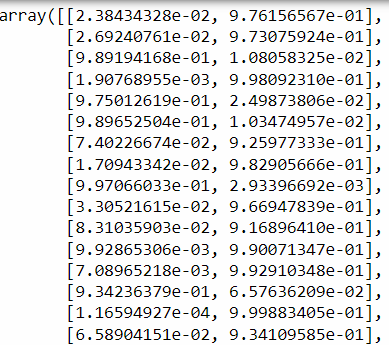

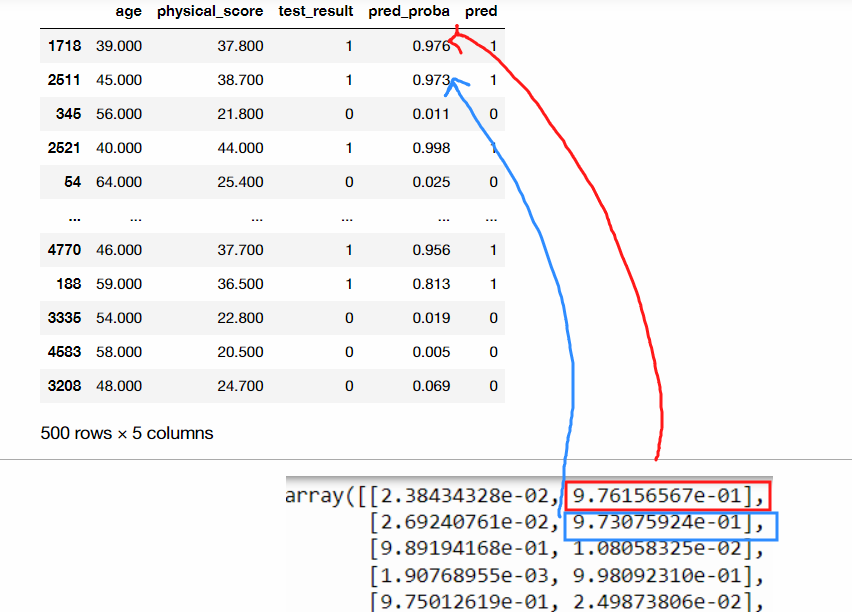

In [29]:
test_data.sample(20)

,age,physical_score,test_result,pred_proba,pred
4961,76.000,23.700,0,0.004,0
257,46.000,38.300,1,0.966,1
3211,49.000,27.000,0,0.152,0
3609,33.000,40.900,1,0.996,1
4403,70.000,28.000,0,0.044,0
2541,52.000,37.700,1,0.929,1
2758,55.000,26.500,0,0.080,0
2785,39.000,42.100,1,0.996,1
2069,68.000,15.800,0,0.000,0
4817,31.000,43.700,1,0.999,1


Adem Hocanın skoru
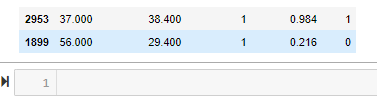

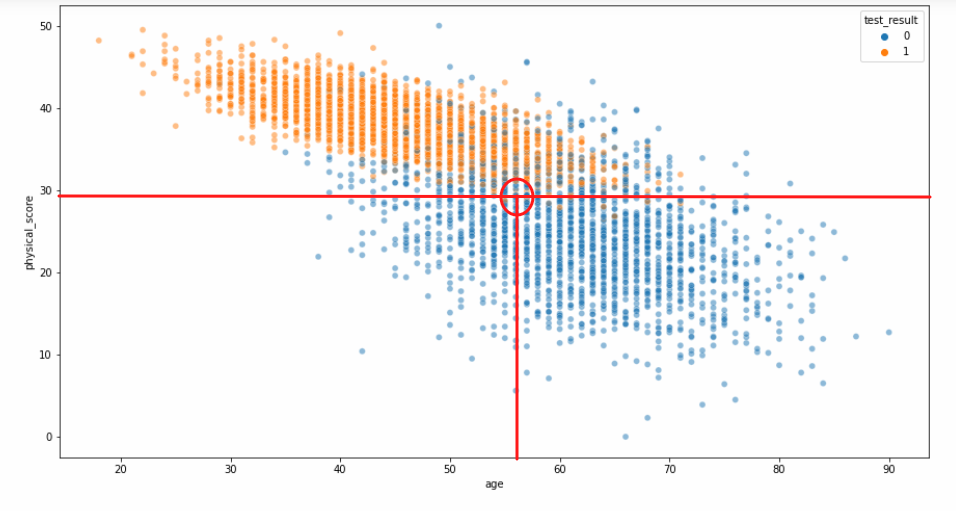

Hatalı olanları getirmek için Anıl Beyden destek

In [30]:
test_data[((test_data["test_result"]==1) & (test_data["pred"]==0)) | ((test_data["test_result"]==0) & (test_data["pred"]==1)) ]

,age,physical_score,test_result,pred_proba,pred
2371,46.000,36.400,0,0.926,1
618,63.000,33.400,1,0.454,0
2145,65.000,35.200,0,0.602,1
3200,60.000,32.900,1,0.465,0
1726,46.000,36.700,0,0.934,1
3731,57.000,31.900,1,0.422,0
3330,57.000,37.000,0,0.864,1
4582,44.000,33.400,0,0.806,1
1165,57.000,34.600,0,0.697,1
1525,46.000,30.700,0,0.527,1


## Model Performance on Classification Tasks

precision_score

recall_score,

accuracy_score,

f1_score

https://medium.com/academy-team/makine-%C3%B6%C4%9Frenmesi-s%C4%B1n%C4%B1fland%C4%B1rma-modelleri-accuracy-precission-recall-f1-score-log-loss-and-e2c37fbcf285

In [31]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

### Accuracy (Doğruluk):

Doğruluk (Accuracy): Modelin doğru tahmin ettiği örneklerin oranıdır. Doğruluğun maksimum değeri 1 olabilir. Örneğin, 100 örneğin 80'inin doğru sınıflandırıldığı bir modelin doğruluk skoru 0.8 olacaktır. Aşağıdaki formülden de anlaşılacağı üzere doğruluk doğru bilinen tahminlerin tüm tahminlere oranı olarak ifade edilebilir.

Formül:

Doğruluk = (TP + TN) / (TP + TN + FP + FN)

TP (True Positive): doğru pozitif sayısı

TN (True Negative): doğru negatif sayısı

FP (False Positive): yanlış pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.


In [32]:
accuracy_score(y_test, y_pred)

0.93

In [33]:
log_model.score(X_test_scaled, y_test) # log_model içine x ve y testleri alır. accuracy_score ile aynı değerleri verir. 

0.93

### Test Size % 20 olan arkadaşların aldığı skor (karşılaştırma için). Train datasına daha fazla gözlem ayırmak daha iyi skor almayı etkiliyor mu nun cevabı

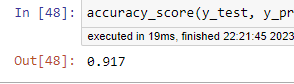

## Precision (Hassasiyet)

Pozitif olarak sınıflandırılan örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Hassasiyet modelin pozitif sınıfı doğru sınıflandırma yeteneğini ölçmektedir. Hassasiyet skoru, yanlış pozitif sınıflandırmaların sayısını (yanlış pozitifler) gerçek pozitif sınıflandırmaların sayısına (doğru pozitifler) oranlaması ile hesaplanmaktadır. Aşağıdaki formülden de anlaşılacağı üzere hassasiyet pozitif olarak doğru bilinen tahminlerin tüm pozitif tahminlere oranı olarak ifade edilebilir.

Formül:

Hassasiyet = TP / (TP + FP)

TP (True Positive): doğru pozitif sayısı

FP (False Positive): yanlış pozitif sayısı


Örnek: 100 örneğin 80'ini pozitif olarak sınıflandıran bir modelin %75 hassasiyeti varsa, 60 örneğin gerçekten pozitif olduğunu söyleyebiliriz.

In [34]:
precision_score(y_test, y_pred)

0.9331210191082803

Traget her zaman 1.

### Test Size % 20 olan arkadaşların aldığı skor (karşılaştırma için). Train datasına daha fazla gözlem ayırmak daha iyi skor almayı etkiliyor mu nun cevabı


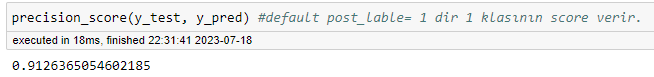

## Recall (Duyarlılık)

Gerçek pozitif örneklerin ne kadarının pozitif olarak sınıflandırıldığını gösterir. Aşağıdaki formül incelendiğinde duyarlılık, pozitif olarak doğru tahmin edilenlerin gerçek pozitiflere oranı olarak ifade edilebilir.

Formül:

Duyarlılık = TP / (TP + FN)

TP (True Positive): doğru pozitif sayısı

FN (False Negative): yanlış negatif sayısıdır.

Örnek: 100 gerçek pozitif örneğin 80'ini doğru olarak sınıflandıran bir modelin %80 duyarlılığı vardır.

Datanin pozitif cikmasinin önemli oldugu durumlarda tercih edilen metric olarak söyleyebiliriz.
Pozitiflerin ne kadarini dogru olarak bilebilmisiz.

In [35]:
recall_score(y_test, y_pred)

0.9543973941368078

## F1 Score ( precission / recall)

F1 Skor = 2 * ((Precision * Recall) / (Precision + Recall))

Precision: Hassasiyet

Recall: Duyarlılık

Örnek: 0,8 hassasiyeti ve 0,8 geri çağırması olan bir modelin F1 puanı 0,8x0,8/(0,8+0,8) = 0,8'dir.

In [36]:
f1_score(y_test, y_pred)

0.9436392914653785

### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [38]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

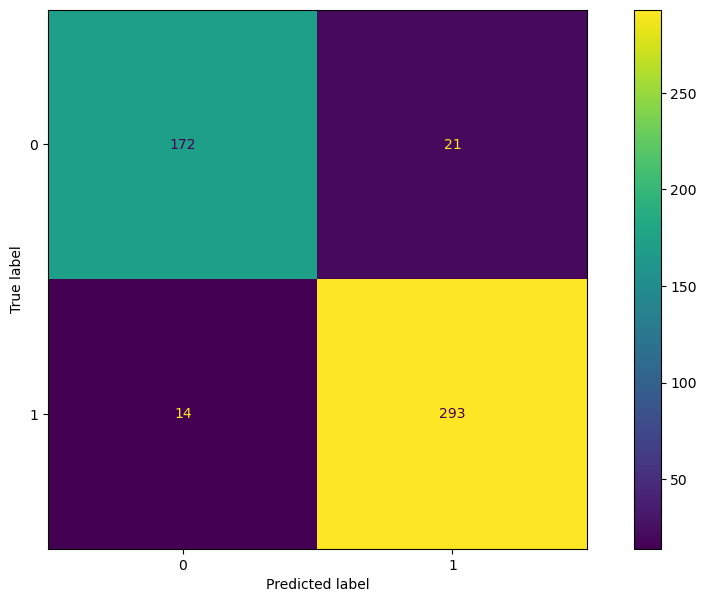

In [39]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

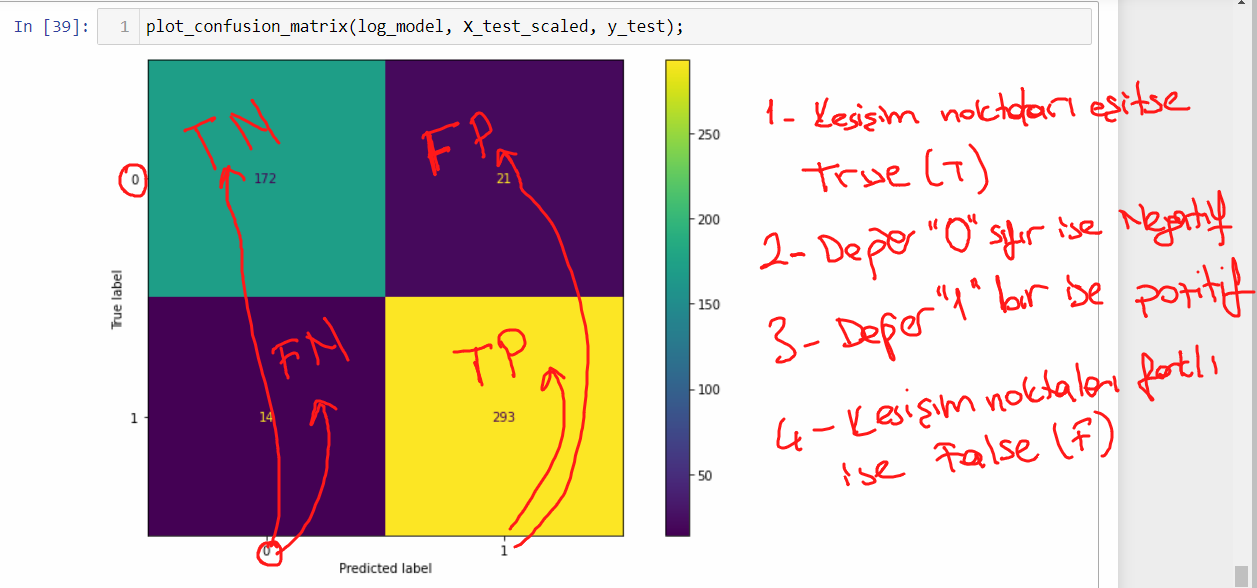

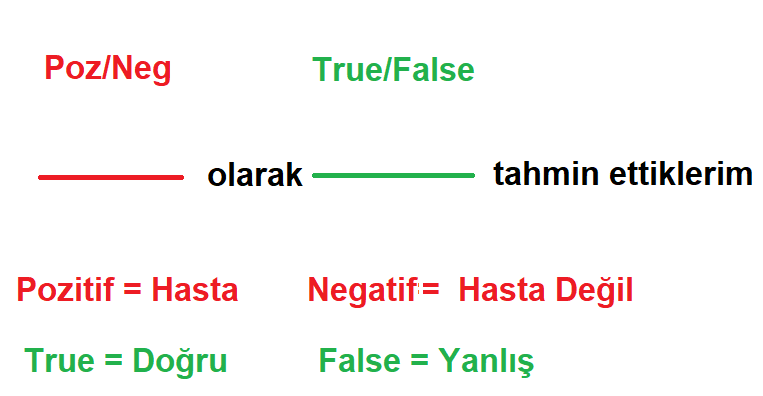

### normalize = 'true'

normalize='true' seçeneğini kullandığınızda, her satırın toplamı 1'e eşit olacak şekilde karışıklık matrisinin değerleri ölçeklendirilir. Bu, her bir gerçek sınıf için, modelin bu sınıfı doğru veya yanlış olarak ne sıklıkla tahmin ettiğini daha iyi anlamak için kullanışlıdır. Özellikle, sınıf dengesizliği olan durumlarda bu normalizasyon, her bir sınıfın performansını daha iyi değerlendirmenize olanak tanır.

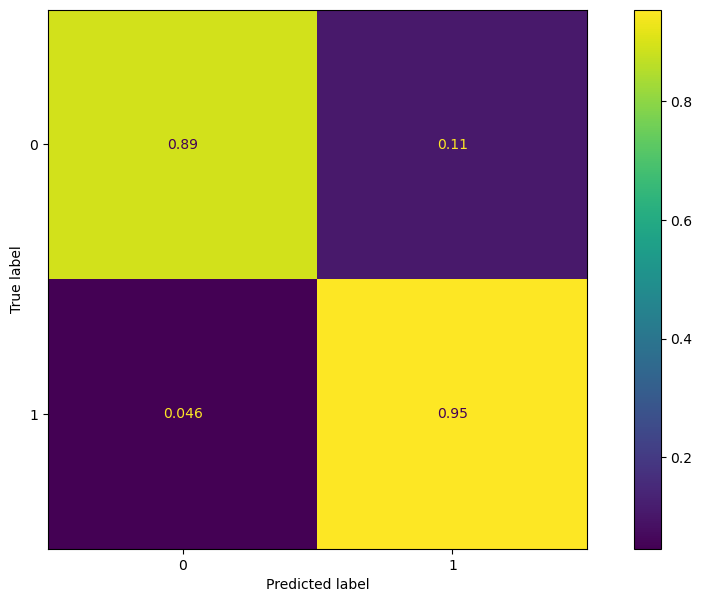

In [40]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize = 'true');

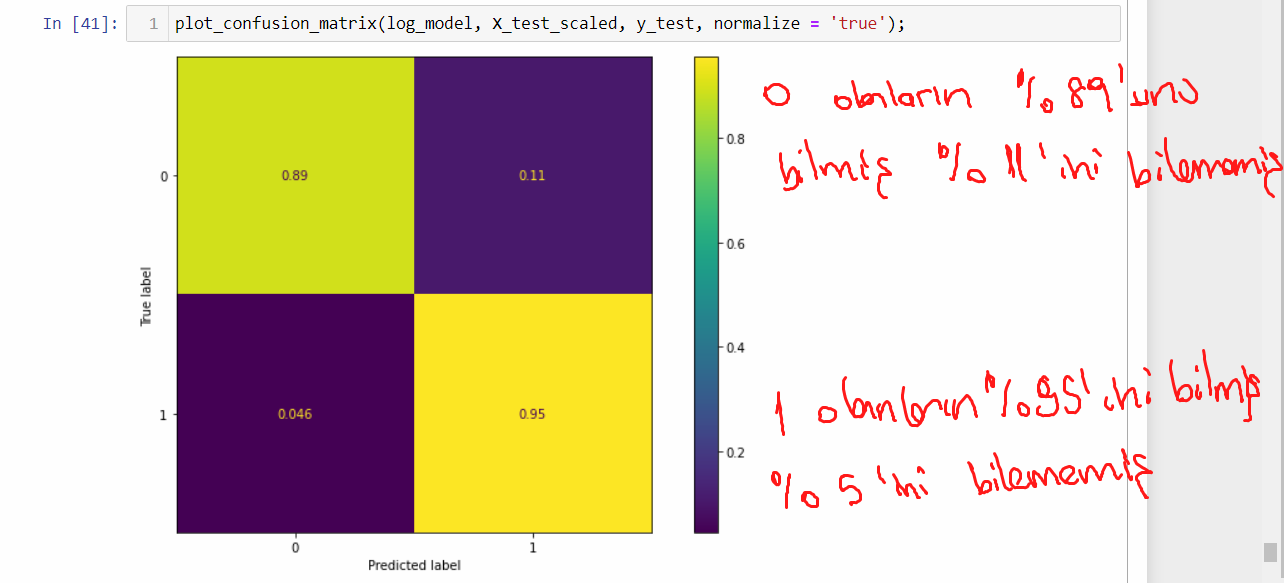

### normalize = 'pred'

normalize='pred': Matrisin değerleri, tahmin edilen sınıf etiketleri bazında normalize edilir. Yani, her sütunun toplamı 1 olacak şekilde değerler ölçeklendirilir. Bu, belirli bir sınıf olarak tahmin edilen örneklerin gerçekte hangi sınıflara ait olduğunu yüzde olarak gösterir.

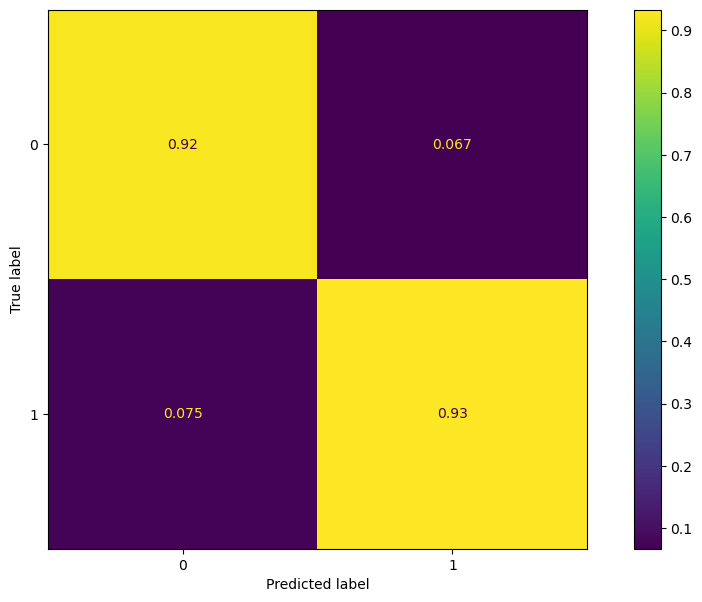

In [41]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize = 'pred');

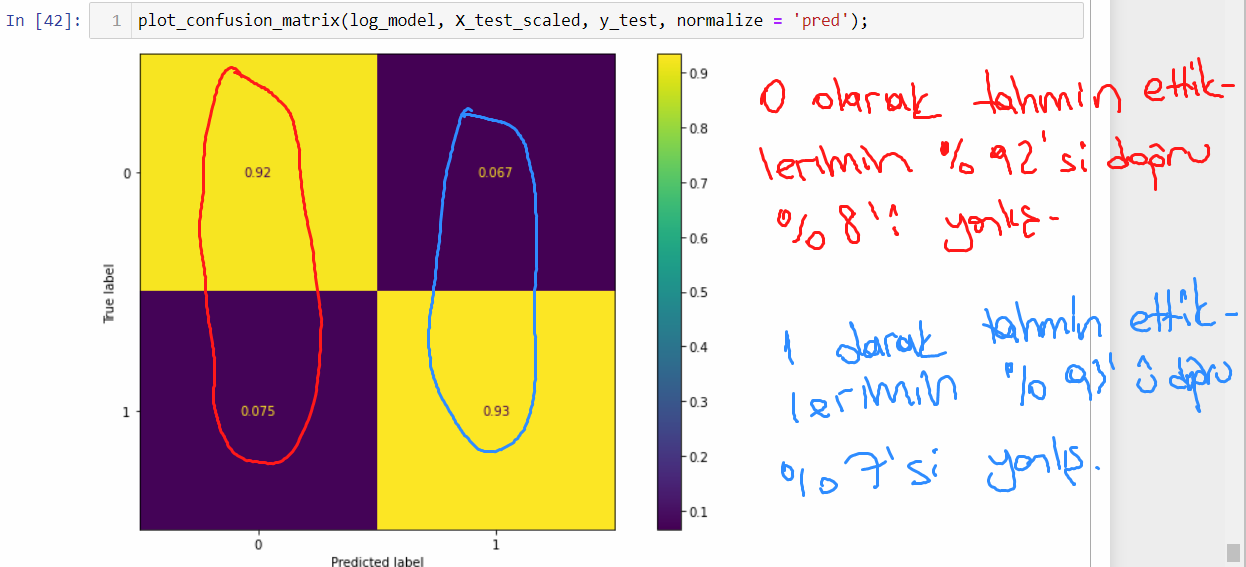

classification_report da sadece bir değere bakmak doğru değil örneğin accuracy. Burada bütün değerlerin birbiri ile uyumlu olması önem arz ediyor. İsteğimiz bu.

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



1'lerde yani target degerlerin daha yüksek oldugunu görüyoruz bu modelimizin hedeflerimiz icin basarili oldugunu gösteriyor.

- Precision Kesinlik: Pozitif olarak tahminlerimizde ne kadar tutarliyiz.
- Recall Duyarlilik: Gercekte pozitif olmasi gereken degerlerde ne kadar dogru oranda tahminde bulunduk.

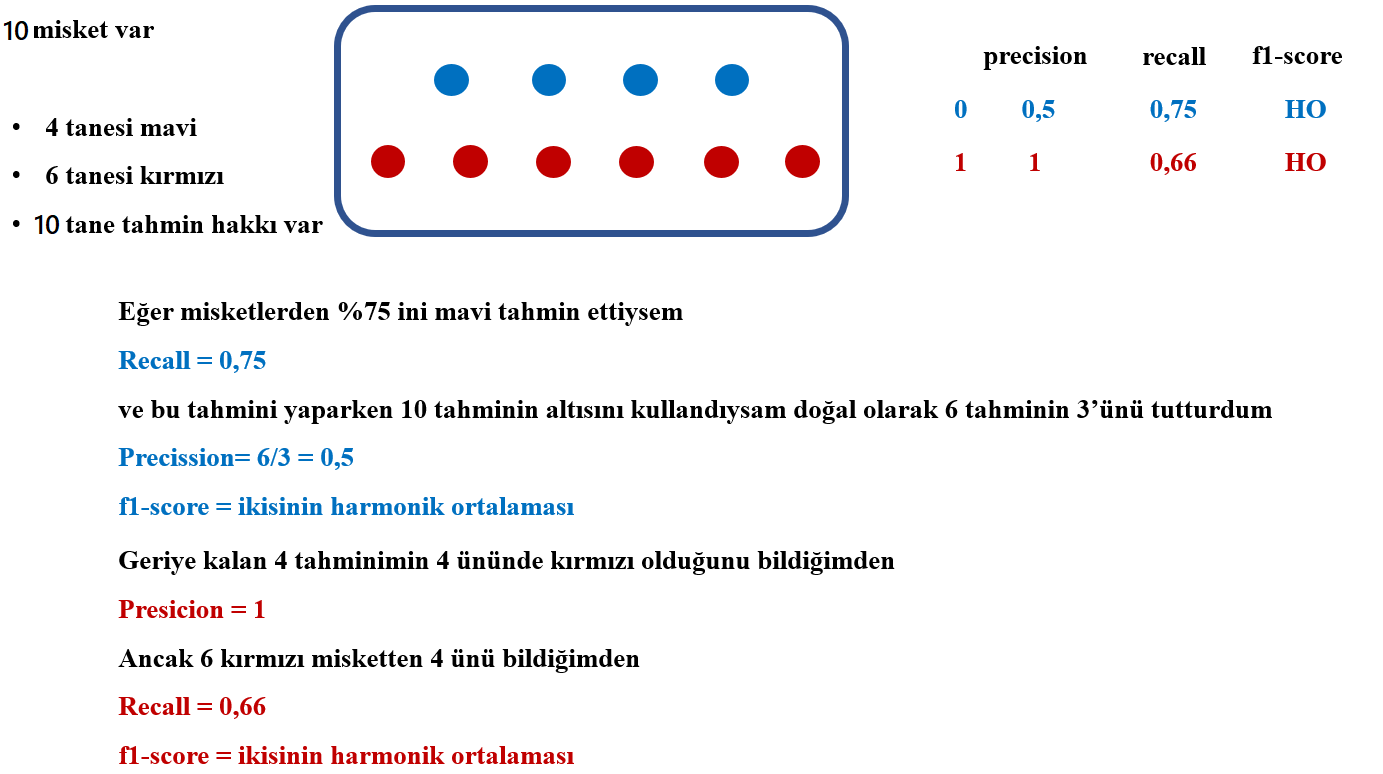

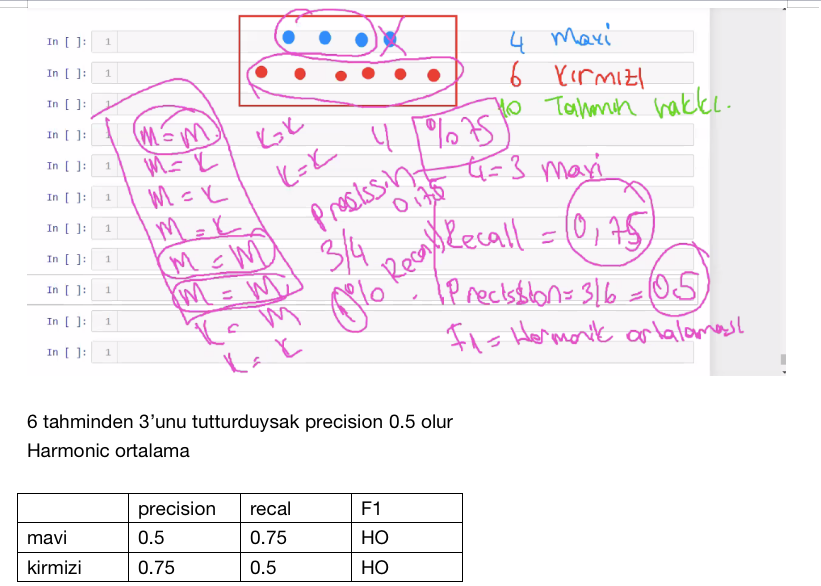

- precision: toplam mavi tahminlerimden kac tanesini dogru bilmisim--> 3/6=0.5

- recall: toplam gerceklesen mavilerden kac tanesini dogru bilmisim--> 3/4=0.75

- https://www.youtube.com/watch?v=qWfzIYCvBqo

classification_report ile tüm skorlaı gösterir.

support = test datamın içinde kaç tane 0 kaç tane 1 değeri var.

macro avg = 0 ile 1'in ortalamsı

weighted avg = 0 ile 1'in ağırlıklı ortalamsı 500 ise bu oranların test datasının tamamına göre verildiğini gösterir.

accuracy = Benim tüm doğrularımın tahminlerime oranı

recall = burada hedef class a göre yorum yapalım bizimki 1 di. ben 1 olanların %'de kaçını bildim. biz 1 class ına göre baktık

precision = Benim 1 dediklerimin % kaçı doğru. tahim edilenlerde kaçı tanesi doğru. tahmin edilenden kaç tanesini bilmiş bunun oranı. Burada anlaşılması gereken husus ben tahmin yaparken belki 100 doğru değer için 105 tahminde bulundum doğal olarak bu değer azıcık düşmüş. Kısaca modelin tahmin gücünü gösteriyor diyebiliriz. ne kadar çok tahmin yaparsa değer düşer. Kısaca ben 193 tane hasta deyim hastayı tahmin ederken 500 tahminde bulunsun istemiyorum bu sebeple recall ile precission arasında bir denge olmalı.

f1 = precission ve recall arasındaki dengeyi gösterir.

precision ve recal değerleri dengede olmalı birbirine yakın olmalıdır.

aşağıdaki sonuçta 1 clasının skorları biribriyle uyumludur.

test ve train setlerinin sonuçlarına bakılır uyum varmı overfiting varmı.

In [43]:
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



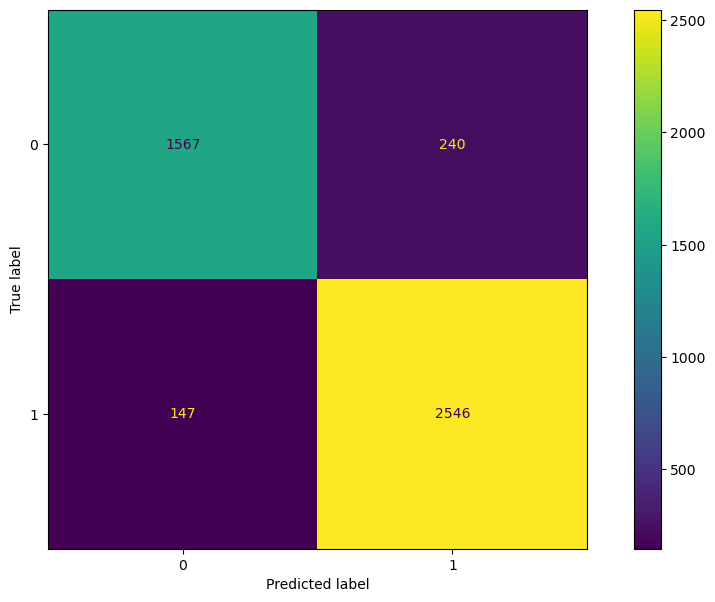

In [44]:
plot_confusion_matrix(log_model, X_train_scaled, y_train);

## CV

In [45]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [46]:
from sklearn.model_selection import cross_validate

In [47]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.011,0.006,0.900,0.889,0.952,0.919
2,0.029,0.008,0.924,0.921,0.956,0.938
3,0.017,0.010,0.936,0.917,0.981,0.948
4,0.012,0.006,0.931,0.938,0.948,0.943
5,0.014,0.015,0.938,0.941,0.955,0.948
6,0.009,0.004,0.902,0.934,0.900,0.917
7,0.012,0.004,0.898,0.889,0.948,0.917
8,0.017,0.006,0.911,0.896,0.963,0.928
9,0.007,0.003,0.891,0.910,0.907,0.909
10,0.013,0.003,0.916,0.911,0.952,0.931


In [48]:
df_scores.mean()[2:]  # cv sonuçların ortalaması 

test_accuracy    0.915
test_precision   0.915
test_recall      0.946
test_f1          0.930
dtype: float64

### Test ile Train skorlarını karşılaştırıyoruz

In [49]:
print("Test Set")
print(classification_report(y_test,y_pred))
print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500

Train Set

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1807
           1       0.91      0.95      0.93      2693

    accuracy                           0.91      4500
   macro avg       0.91      0.91      0.91      4500
weighted avg       0.91      0.91      0.91      4500



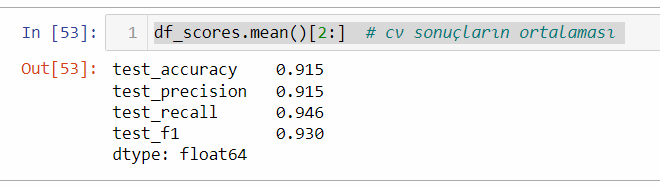

## ROC (Receiver Operating Curve)

ROC eğrisi, gerçek pozitif oranı (True Positive Rate, TPR) ile yanlış pozitif oranı (False Positive Rate, FPR) arasındaki ilişkiyi gösterir. Bu eğri, farklı eşik değerlerine karşı modelin performansını grafik üzerinde gösterir.

True Positive Rate (TPR) ya da Hassasiyet (Sensitivity): Gerçekten pozitif olan örneklerin ne kadarının doğru bir şekilde pozitif olarak tahmin edildiğini gösterir.

TPR= 
TP+FN
TP

 

False Positive Rate (FPR) ya da 1 - Özgüllük (1 - Specificity): Gerçekte negatif olan örneklerin ne kadarının yanlışlıkla pozitif olarak tahmin edildiğini gösterir.

FPR= 
FP+TN
FP

ROC eğrisi, TPR'nin FPR'ye karşı nasıl değiştiğini gösterir. İdeal bir ROC eğrisi, sol üst köşeye yakın olacaktır. Yani TPR'nin yüksek, FPR'nin düşük olduğu bir durumu ifade eder.

In [50]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve

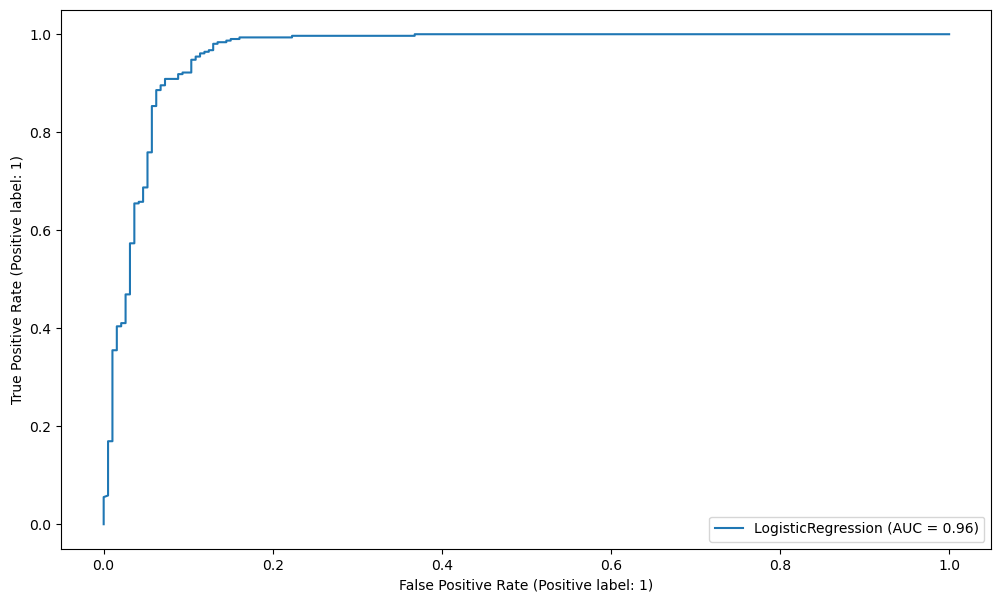

In [51]:
plot_roc_curve(log_model, X_test_scaled, y_test);

grafiğin y ekseni yani True Possitive rate = recall yani gerçekte 1 olanların yüzde kaçını bildim.

x ekseni ise False possitive rate bunun başka bir adı yok:) buda sıfırların %'de kaçını bilemedim.

Bu grafiğin alanı ne kadar büyükse tahminim o kadar büyük olasılıkla doğru tahmin yapıyor demek. Yani %96 oranında doğru tahmin yapıyor.

burda verdiği değerin yüksek olması modelimin çok iyi bir ayrıştırma yapması demek dost ile düşmanı ayırt ediyor.

literatür %90 ve üzerine çok başarılı kabul ediyor.

doğal olarak asadece recall f1 accuracy precission değerlerine bakmayacağız modelin genel performansını değerlendirirken bu skora da bakacağız

- ROC eğrisi de bize F1 değeri arttıkça AUC altında kalan alanın arttığını göstermiştir.

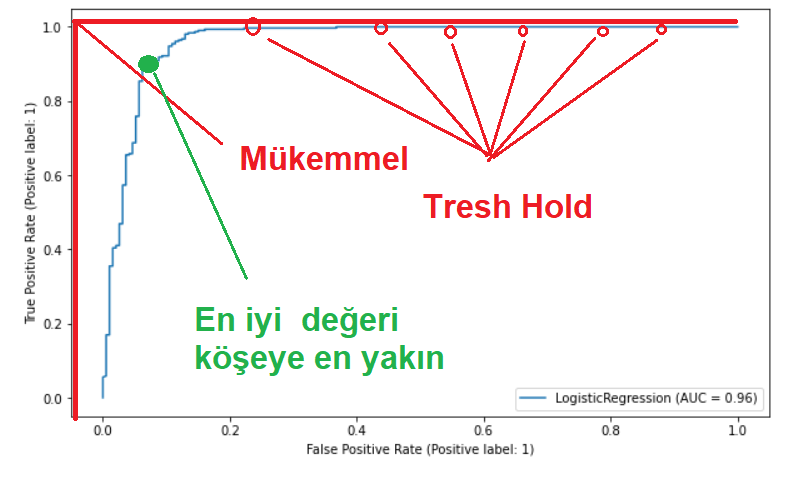

In [52]:
roc_auc_score(y_test, y_pred_proba[:,1]) #olasılıklar üzerinden sonuç verdiği için 1 clasının y_test ve y_pred_proba verilir 

0.9630132824762451

In [53]:
roc_auc_score(y_test, y_pred) ## Yanlış skor bunu görürseniz eleştirin.

0.9227945519906837

Burada neden fark çıktı peki

çünkü buradaki değerler 0 ve 1 e göre

ama proba daki değerler olasılık

şöyleki olasılık yaparken 0,45 de 0 a geçti 0,01 de değilmi

işte olasılık değerleri direk bu değerler olduğundan bu sebeple proba daha yüksek çıktı. ROC AUC curve bunula hesaplanıyor

- balanced bir datam varsa, roc’a bak
- Balance data degilse, precision_recall_curve’e bak. Zaten de farkli cikar.
- roc ile precision_recall_curve ayni ise, zaten bunlardan guzel sonuclar cikar.

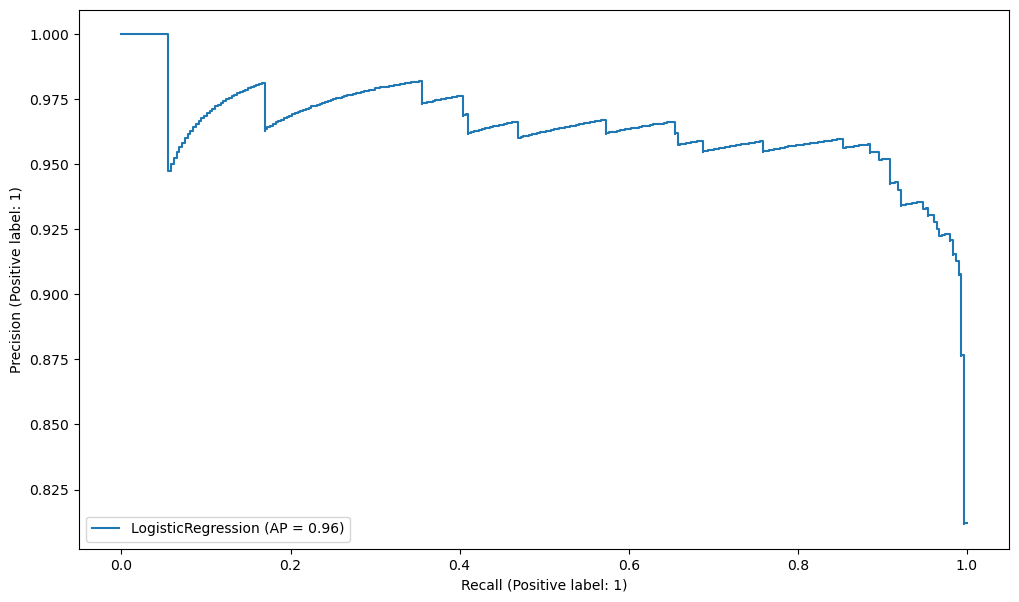

In [54]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test); 
# dengesiz datasetlerinde kullanırız.

 ## Not tüm data için 
 
Eğer Data balance data ise yani target daki class lar ın gözlem sayısı bir birine yakınsa örneğin 5000 satırlı datada 0 lar 2500 iken 1 ler 2500 ise veya aralarında çok uçurum yoksa o zaman ROC skora bakıyoruz
 
Eğer data unbalaced data ise Precission Recall Curve skoruna bakıyoruz.
 
 balance datada bu iki skor (ROC ve PRC) aynı yada çok minimum farkla yakın çıkarken unbalanced data da skorlar farklı çıkmakta bu durumda skorların farklı olmasından dolayı datamızın balanced yada unbalanced olduğunu anlayabiliriz. 

## Final Model and Model Deployment

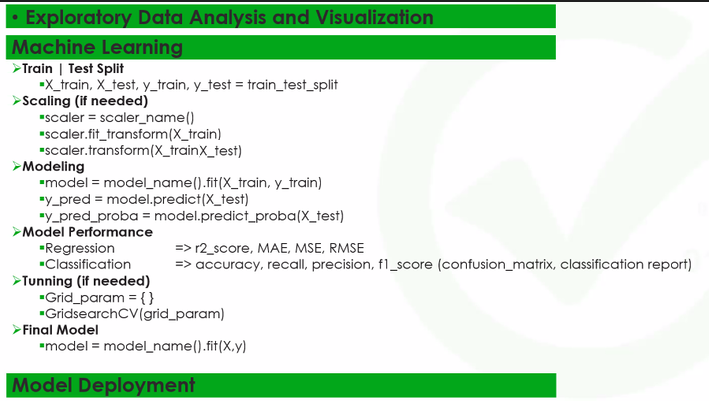

In [71]:
scaler = StandardScaler().fit(X) 
#Model scale edilmis bicimde calisilmisti. Final model'de ayni sekilde standardize etmemiz gerekiyor

In [56]:
import pickle # Modeli kaydetmek için kullanılır.

In [57]:
pickle.dump(scaler, open("scaler_hearing", "wb"))

In [58]:
X_scaled = scaler.transform(X)

In [72]:
final_model = LogisticRegression().fit(X_scaled, y)
#Final Modeli tekrar fit edip egitiyoruz.

In [73]:
pickle.dump(final_model, open("final_model_hearing", 'wb')) 
#transform ve fit ettiğimiz X datayı final olarak kayıt edilir.

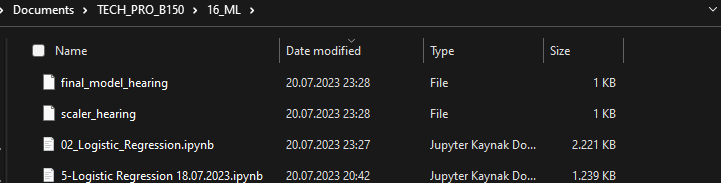

## lokalde wb (write binary) yaptığının resmidir

In [61]:
my_dict = {"age": [20, 30, 40, 50, 60],
           "physical_score": [50, 30, 20, 10, 5]}

In [62]:
sample = pd.DataFrame(my_dict) # modele test etmek için dict içinde df oluşurulur. 
sample

,age,physical_score
0,20,50
1,30,30
2,40,20
3,50,10
4,60,5


In [69]:
scaler_hearing = pickle.load(open("scaler_hearing", "rb")) # model load edilir - read binary

In [64]:
sample_scaled = scaler_hearing.transform(sample) # modele (scaler_hearing) df (sample) verilir  
sample_scaled

array([[-2.80075819,  2.11038956],
       [-1.91469467, -0.33789511],
       [-1.02863115, -1.56203745],
       [-0.14256762, -2.78617979],
       [ 0.7434959 , -3.39825096]])

In [65]:
final_model = pickle.load(open("final_model_hearing", "rb"))

In [66]:
predictions = final_model.predict(sample_scaled) # final modele predict için scale edilen sample verilir
predictions_proba = final_model.predict_proba(sample_scaled) # samplenin proba değerlerini alırız

In [67]:
sample["pred"] = predictions
sample["pred_proba"] = predictions_proba[:,1]
sample

,age,physical_score,pred,pred_proba
0,20,50,1,1.000
1,30,30,1,0.730
2,40,20,0,0.016
3,50,10,0,0.000
4,60,5,0,0.000
